# 시계열 데이터 기초

In [1]:
# 필요 라이브러리 로딩
import pandas  as pd # Pandas의 DatetimeIndex를 사용할 것임
import numpy as np # random seed 및 난수 생성

In [2]:
# 아래와 같이 임의의 날짜 문자열로 생성
date = ["2020/01/01","2020/02/01","2020/03/01","2020/04/01"] # 날짜 문자열
date_idx = pd.to_datetime(date) # 날짜 문자열 -> DatetimeIndex

print(date_idx)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)


In [4]:
np.random.seed(1) # 고정된 난수만 나오도록 시드 설정

# 3과 10사이의 정수로 구성된 4개의 원소를 가진 넘파이 난수 배열 생성
random_int = np.random.randint(3,10,size=4)
print(random_int)

[8 6 7 3]


In [9]:
# 넘파이 배열 시리즈로 변환
series = pd.Series(random_int, index=date_idx, name="num")
display(series)

2020-01-01    8
2020-02-01    6
2020-03-01    7
2020-04-01    3
Name: num, dtype: int32

date 문자열이 "yyyy/mm/dd" 형식이 아니라도 대부분의 경우에서 to_datetime 함수를 사용할 수 있다

In [12]:
# 예제 1) 마침표로 구분된 날짜
date = ["2020.01.01","2020.02.01","2020.03.01","2020.04.01"]
date_idx2= pd.to_datetime(date)

print(date_idx2)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)


In [13]:
# 2) 띄어쓰기
date = ["2020 01 01","2020 02 01","2020 03 01","2020 04 01"]
date_idx3 = pd.to_datetime(date)

print(date_idx3)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)


### pd.date_range

In [14]:
# date_range : 시작일과 기간을 인수로 설정
pd.date_range('2020-1-1','2020-5-31') # 해당 기간 일별 데이터로 출력

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [15]:
# 월별 데이터 출력
pd.date_range('2020-1-1','2020-5-31', freq='M') # freq = 'M' : 월별 데이터로 생성 인수(각 월말일 기준)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
pd.date_range('2020-1-1','2020-5-31',freq='MS') # 월별 각 첫일로 데이터 생성

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='MS')

freq 인수에 관한 자세한 사항은 공식 레퍼런스 참조
* D : 일별(default)
* W : 주별(일요일기준)
* W-MON : 주별(월요일 기준)
* M : 월별(월의 마지막 날)
* MS : 월별(월의 시작 날)
* B : 주말을 제외한 평일 인덱스(토, 일 제외)

In [17]:
# 시작일 명시 x, preiods 명시
pd.date_range(start='2020-1-1',periods=45) # 45개 일별 데이터 리턴

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# periods & freq 명시
pd.date_range(start='2020-1-1', periods=45, freq='MS') # 45개 월별 데이터 리턴

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01'],
              dtype='datetime64[ns]', freq='MS')

### 시계열의 shift

In [19]:
# shift는 데이터를 하나씩 이동시키는 것이다
# 금융같은 경우는 당일 기준 전날 가격을 산출할 때 등 쓰임

In [22]:
np.random.seed(1) # 고정된 난수만 출력하도록 시드 설정
arr = np.random.randn(12) # 가우시안 정규분포 확률을 따르는 난수 12개 생성
ts_idx = pd.date_range('2020-1-1',periods=12, freq='MS')

# 날짜 인덱스와 어레이를 이용하여
ts = pd.Series(arr, index = ts_idx) # 시리즈 생성
print(ts)

2020-01-01    1.624345
2020-02-01   -0.611756
2020-03-01   -0.528172
2020-04-01   -1.072969
2020-05-01    0.865408
2020-06-01   -2.301539
2020-07-01    1.744812
2020-08-01   -0.761207
2020-09-01    0.319039
2020-10-01   -0.249370
2020-11-01    1.462108
2020-12-01   -2.060141
Freq: MS, dtype: float64


In [23]:
# 1개월치 데이터 이동
ts.shift(1) # 한칸씩 데이터가 뒤로 밀렸다

2020-01-01         NaN
2020-02-01    1.624345
2020-03-01   -0.611756
2020-04-01   -0.528172
2020-05-01   -1.072969
2020-06-01    0.865408
2020-07-01   -2.301539
2020-08-01    1.744812
2020-09-01   -0.761207
2020-10-01    0.319039
2020-11-01   -0.249370
2020-12-01    1.462108
Freq: MS, dtype: float64

In [24]:
# 4개월치 데이터 이동
ts.shift(4)

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01         NaN
2020-05-01    1.624345
2020-06-01   -0.611756
2020-07-01   -0.528172
2020-08-01   -1.072969
2020-09-01    0.865408
2020-10-01   -2.301539
2020-11-01    1.744812
2020-12-01   -0.761207
Freq: MS, dtype: float64

In [25]:
# 각 월, 첫주 일요일을 기준으로 데이터 쉬프트
ts.shift(1, freq='W-SUN')

2020-01-05    1.624345
2020-02-02   -0.611756
2020-03-08   -0.528172
2020-04-05   -1.072969
2020-05-03    0.865408
2020-06-07   -2.301539
2020-07-05    1.744812
2020-08-02   -0.761207
2020-09-06    0.319039
2020-10-04   -0.249370
2020-11-08    1.462108
2020-12-06   -2.060141
dtype: float64

### diff(n) : 행 -n 기간전 행

In [26]:
# 1개월치 차분 값 연산
ts.diff(1) # 차분 값 = 현재 달 - 1 달 전

2020-01-01         NaN
2020-02-01   -2.236102
2020-03-01    0.083585
2020-04-01   -0.544797
2020-05-01    1.938376
2020-06-01   -3.166946
2020-07-01    4.046350
2020-08-01   -2.506019
2020-09-01    1.080246
2020-10-01   -0.568409
2020-11-01    1.711478
2020-12-01   -3.522249
Freq: MS, dtype: float64

In [27]:
# 연산 방식
ts[1]-ts[0]

-2.236101777313317

In [28]:
# 3개월치 차분 값 연산
ts.diff(3) # 현재달 - 3개월 전 데이터

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01   -2.697314
2020-05-01    1.477164
2020-06-01   -1.773367
2020-07-01    2.817780
2020-08-01   -1.626615
2020-09-01    2.620578
2020-10-01   -1.994182
2020-11-01    2.223315
2020-12-01   -2.379180
Freq: MS, dtype: float64

In [29]:
ts[3]-ts[0]

-2.697313985819412

### resample

In [35]:
np.random.seed(1)
arr = np.random.randn(365) # 365일치 난수 생성
time_idx = pd.date_range('2021-1-1',periods=365,freq='D')

ts = pd.Series(arr, index=time_idx) # 1년치 사계월 데이터 생성
print(ts)

2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
                ...   
2021-12-27   -0.557495
2021-12-28    0.939169
2021-12-29   -1.943323
2021-12-30    0.352494
2021-12-31   -0.236437
Freq: D, Length: 365, dtype: float64


### down-sampling

In [36]:
ts.resample('M').mean() # 일별 데이터를 월별로 변환
# 월별 평균, 월별 최고 값 등 많이 쓰임

2021-01-31   -0.080317
2021-02-28    0.075127
2021-03-31    0.186964
2021-04-30   -0.036879
2021-05-31    0.183157
2021-06-30    0.083610
2021-07-31    0.135417
2021-08-31    0.106348
2021-09-30    0.100417
2021-10-31   -0.057832
2021-11-30    0.255580
2021-12-31   -0.305686
Freq: M, dtype: float64

### up-sampling

In [38]:
# up-sampling 결측치 filling 방식에는 up sampling, down sampling이 있다
# 하지만 데이터 신뢰성이 떨어지기 때문에 실무에서 사용하기엔 무리가 있다.
# 업샘플링 예제
arr = np.random.randn(10) # 새로운 난수 10개 생성
time_idx = pd.date_range('2020-1-1', periods=10, freq='W')# 주별 데이터 10개 생성

print(time_idx)

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08'],
              dtype='datetime64[ns]', freq='W-SUN')


In [40]:
# Series 생성
ts = pd.Series(arr, index=time_idx)
display(ts)

2020-01-05    0.564383
2020-01-12    2.137828
2020-01-19   -0.785534
2020-01-26   -1.755926
2020-02-02    0.714790
2020-02-09    0.852704
2020-02-16    0.035360
2020-02-23   -1.538793
2020-03-01   -0.447895
2020-03-08    0.617986
Freq: W-SUN, dtype: float64

In [46]:
# forward filling 방식
ts.resample('D').ffill().head(21) # ffill : 각 기간의 첫일을 참고하여 결측값 보간
# series.head(21) : 앞에서부터 21개

pandas.core.series.Series

In [48]:
# backward filling 방식
ts.resample('D').bfill().head(21)

2020-01-05    0.564383
2020-01-06    2.137828
2020-01-07    2.137828
2020-01-08    2.137828
2020-01-09    2.137828
2020-01-10    2.137828
2020-01-11    2.137828
2020-01-12    2.137828
2020-01-13   -0.785534
2020-01-14   -0.785534
2020-01-15   -0.785534
2020-01-16   -0.785534
2020-01-17   -0.785534
2020-01-18   -0.785534
2020-01-19   -0.785534
2020-01-20   -1.755926
2020-01-21   -1.755926
2020-01-22   -1.755926
2020-01-23   -1.755926
2020-01-24   -1.755926
2020-01-25   -1.755926
Freq: D, dtype: float64

### 시계열 데이터 시각화

In [50]:
# 필요 데이터 사용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 그래프 상세 속성 설정

In [72]:
np.random.seed(1) # 난수 고정

ts_date = np.random.randn(365,3) #(365x3) 행렬의 난수 데이터 생성
ts_idx = pd.date_range('2020-1-1', periods=365)
ts_df = pd.DataFrame(ts_date, index=ts_idx)

display(ts_df.head()) # head는 default = 5임

,0,1,2
2020-01-01,1.624345,-0.611756,-0.528172
2020-01-02,-1.072969,0.865408,-2.301539
2020-01-03,1.744812,-0.761207,0.319039
2020-01-04,-0.249370,1.462108,-2.060141
2020-01-05,-0.322417,-0.384054,1.133769


In [73]:
columns = ['x','y','z']
ts_df.columns = columns
display(ts_df)

,x,y,z
2020-01-01,1.624345,-0.611756,-0.528172
2020-01-02,-1.072969,0.865408,-2.301539
2020-01-03,1.744812,-0.761207,0.319039
2020-01-04,-0.249370,1.462108,-2.060141
2020-01-05,-0.322417,-0.384054,1.133769
...,...,...,...
2020-12-26,0.627177,0.162808,0.288617
2020-12-27,0.058307,1.631936,-0.401789
2020-12-28,-0.199939,0.007389,0.275664
2020-12-29,-1.763250,1.387974,0.226200


<AxesSubplot:>

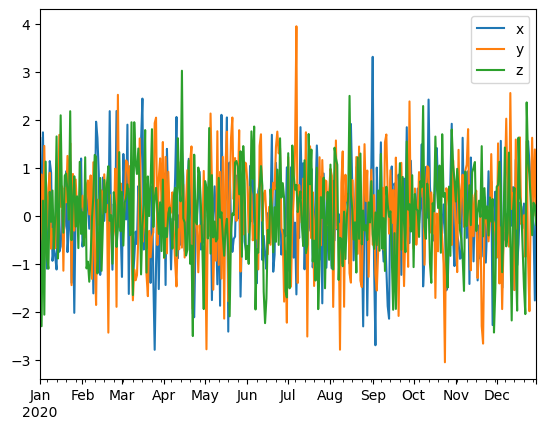

In [74]:
# 단순하게 데이터프레임의 메소드인 plot을 호출하면 됨
ts_df.plot()

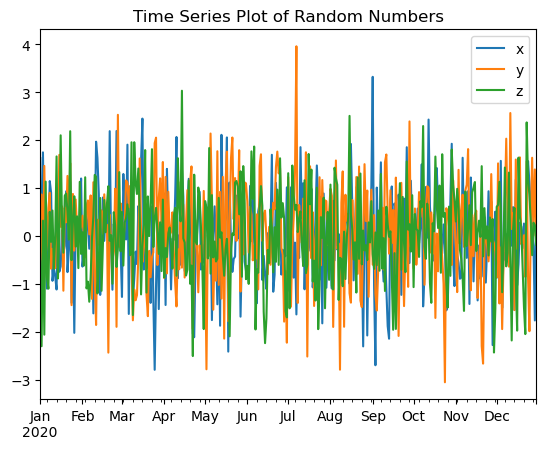

In [75]:
ts_df.plot() # 그래프에 그려만 놓고, 출력은 하지 않음
plt.title('Time Series Plot of Random Numbers')
plt.show() #그래프 출력용 커맨드

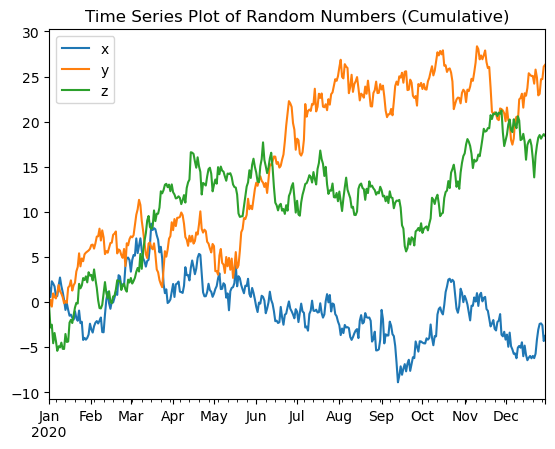

In [76]:
# 누적합 함수를 이용하여 알아보기 쉽게 각 시리즈를 변경
ts_df = ts_df.cumsum()
ts_df.plot()
plt.title('Time Series Plot of Random Numbers (Cumulative)')
plt.show()

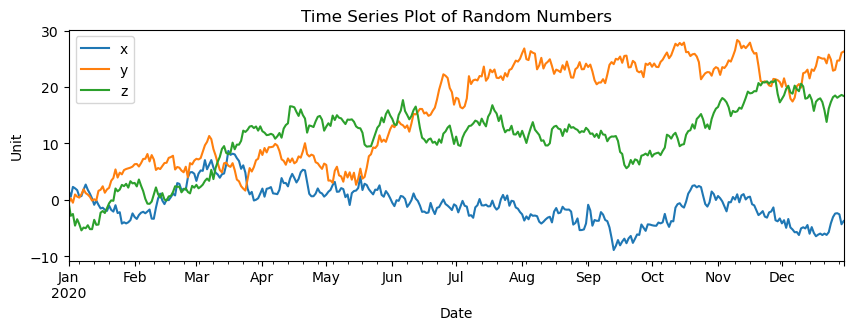

In [77]:
ts_df.plot(figsize=(10,3)) # 가로, 세로
plt.title('Time Series Plot of Random Numbers')
plt.xlabel('Date')
plt.ylabel('Unit')
plt.show()

In [83]:
type(ts_df['x'])

pandas.core.series.Series

### ice cream 데이터셋 로딩

In [80]:
ice_df = pd.read_csv('./data/latte_ice_cream.csv') # year, month, date, sales_amount
display(ice_df)

In [81]:
ice_df.info()

NameError: name 'ice_df' is not defined

In [ ]:
ice_df.index # RangeIndex(start=0, stop=168, step = 1)

In [ ]:
# series의 astype 함수를 이용하여 데이터형 변경
# 정수값인 year 값을 문자열로 변경
ice_df['year'] = ice_df['year'].astype(str)

# 마찬가지로 month와 date도 문자열로 변경
ice_df['month'] = ice_df['month'].astype(str)
ice_df['date'] = ice_df['date'].astype(str)

In [ ]:
ice_df.info()

In [ ]:
# 날짜 문자열 생성
date_str = ice_df['year'] + '-' + ice_df['month'] + '-' + ice_df['date']
date_str[:5] # 5개 출력

In [ ]:
# Datetime index 생성
ice_idx = pd.datetime(date_str)
print(ice_idx)

In [ ]:
# 인덱스 값 변경
ice_df.index = ice_idx
display(ice_df)

In [ ]:
# 불필요한 컬럼 제거
ice_df.drop(['year','month','date'], axis=1, inplace=True)

In [ ]:
# 시도표 [시계열 라인 그래프] 출력
ice_df.plot(figsize(8,3))
plt.show()